In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [4]:
can_data = pd.read_csv("../../raw_data/canada_vehicle_registrations.csv")
can_data = can_data.drop(columns=["GEO", "DGUID", "UOM", "UOM_ID", "SCALAR_FACTOR", "SCALAR_ID", "VECTOR", "COORDINATE", "STATUS", "SYMBOL", "TERMINATED", "DECIMALS"])
can_data = can_data[can_data["Type of vehicle"] == "Total, road motor vehicle registrations"]
can_data = can_data.drop(columns=["Type of vehicle"])

In [5]:
reg_x = can_data["REF_DATE"]
reg_x = np.array(reg_x).reshape(-1,1)
reg_y = can_data["VALUE"]
reg_model = LinearRegression()
reg_model.fit(reg_x, reg_y)
r_sq = reg_model.score(reg_x,reg_y)
intercept = reg_model.intercept_
slope = reg_model.coef_
print(f"R^2: {r_sq}")
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

R^2: 0.9977886109817232
Intercept: -798656493.9240605
Slope: [408177.85338346]


In [6]:
pred_2025 = reg_model.predict(np.array([2025]).reshape(-1,1))
pred_2050 = reg_model.predict(np.array([2050]).reshape(-1,1))
print(f"Predicted vehicle registrations (2025): {pred_2025}")
print(f"Predicted vehicle registrations (2050): {pred_2050}")

Predicted vehicle registrations (2025): [27903659.17744362]
Predicted vehicle registrations (2050): [38108105.51203012]


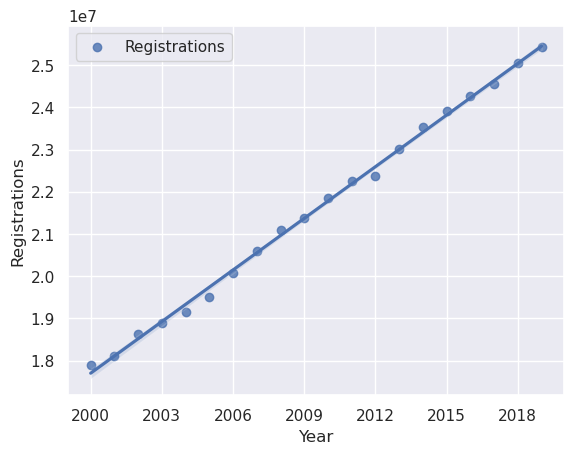

In [7]:
sns.regplot(x=reg_x, y=reg_y, label="Registrations")
# plt.plot(reg_x, reg_model.predict(reg_x), color="k", label="Regression")
plt.xlabel("Year")
plt.xticks(np.arange(reg_x[0], reg_x[len(reg_x)-1], step=3))
plt.ylabel("Registrations")
plt.legend(loc="upper left")
plt.savefig("canada_registrations.png")

In [8]:
on_data = pd.read_csv("../../raw_data/ontario_vehicle_registrations.csv")
on_data = on_data.drop(columns=["GEO", "DGUID", "UOM", "UOM_ID", "SCALAR_FACTOR", "SCALAR_ID", "VECTOR", "COORDINATE", "STATUS", "SYMBOL", "TERMINATED", "DECIMALS"])
on_data = on_data[on_data["Type of vehicle"] == "Total, road motor vehicle registrations"]
on_data = on_data.drop(columns=["Type of vehicle"])

In [9]:
reg_x = on_data["REF_DATE"]
reg_x = np.array(reg_x).reshape(-1,1)
reg_y = on_data["VALUE"]
reg_model = LinearRegression()
reg_model.fit(reg_x, reg_y)
r_sq = reg_model.score(reg_x,reg_y)
intercept = reg_model.intercept_
slope = reg_model.coef_
print(f"R^2: {r_sq}")
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

R^2: 0.9932619092293081
Intercept: -238819899.03909782
Slope: [122697.19924812]


In [10]:
pred_2025 = reg_model.predict(np.array([2025]).reshape(-1,1))
pred_2050 = reg_model.predict(np.array([2050]).reshape(-1,1))
print(f"Predicted vehicle registrations (2025): {pred_2025}")
print(f"Predicted vehicle registrations (2050): {pred_2050}")

Predicted vehicle registrations (2025): [9641929.43834585]
Predicted vehicle registrations (2050): [12709359.41954887]


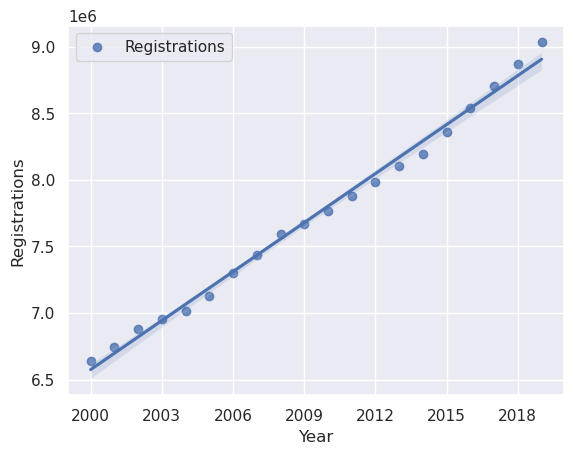

In [11]:
sns.regplot(x=reg_x, y=reg_y, label="Registrations")
# plt.plot(reg_x, reg_model.predict(reg_x), color="k", label="Regression")
plt.xlabel("Year")
plt.xticks(np.arange(reg_x[0], reg_x[len(reg_x)-1], step=3))
plt.ylabel("Registrations")
plt.legend(loc="upper left")
plt.savefig("ontario_registrations.png")